In [1]:
% matplotlib inline

In [1]:
#classの練習 chaos
class chaos:
    
    def __init__(self,x0,r):
        self.x, self.r = x0, r
        
    def update(self):
        self.x = self.r * self.x * (1- self.x)

    def generate_sequence(self,n):
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

In [3]:
ch = chaos(0.1, 4.0) 

In [13]:
#下の二つ、どちらのやり方でもいい。
ch.generate_sequence(5)

[0.09790487641603256,
 0.35327804635997584,
 0.9138906732802184,
 0.3147780422865899,
 0.8627713055232469]

In [14]:
chaos.generate_sequence(ch, 5)

[0.4735879195558363,
 0.997209608026444,
 0.011130422744759724,
 0.04402614573713064,
 0.1683513769146543]

In [1]:
list= [[1,2],[3,4]]

In [20]:
import numpy as np

In [3]:
np.transpose(list)

array([[1, 3],
       [2, 4]])

In [26]:
#KMR　まずは遷移行列
P = 0.2
n = 10
t = 1000
epsilon = 0.1
return_list = [[[4,4],[3,0]],[[0,3],[2,2]]]


In [22]:
#transposeすごいね
np.transpose(return_list)

array([[[4, 0],
        [3, 2]],

       [[4, 3],
        [0, 2]]])

In [23]:
#行動1を選択してる時の、相手の行動による利得一覧
#これがあれば利得の全要素にアクセスできる。
one_return = np.transpose(np.transpose(return_list)[0])
one_return

array([[4, 3],
       [0, 2]])

In [15]:
a = np.empty((2,2))
a

array([[ 0.,  0.],
       [ 0.,  0.]])

In [24]:
#やっと遷移行列
#まず先に、遷移行列と選択行動ごとの期待利得を入れる箱を作る
x = np.empty((n+1,n+1))
payoff0 = np.empty(2)
payoff1 =  np.empty(2)

In [27]:

#準備できた
#最初と、最後は面倒くさそうだから別に作る
#iを1選択者の数として考えていく
for i in range(1,n):
    
    #まずはさっきのpayoff0,payoff1を埋める
    
    #payoff0[0]にはもともと0だった奴が、0のままにした時の期待利得
    #payoff0[1]にはもともと0だった奴が、1のままにした時の期待利得
    payoff0[0] = one_return[0][0]*(n-i-1)/(n-1) + one_return[0][1]*i/(n-1)
    payoff0[1] = one_return[1][0] * (n-i-1)/(n-1) + pne_return[1][1]*i/(n-1)
    
    #payoff1[0]にはもともと1だった奴が、0に変更した時の期待利得
    #payoff1[1]にはもともと1のやつが、1のままにした時の期待利得
    payoff1[0] = one_return[0][0]*(n-i)/(n-1) + one_return[0][1]*(i-1)/(n-1)
    payoff1[1] = one_return[1][0]*(n-i)/(n-1) + one_return[1][1]*(i-1)/(n-1)
    
    #まずは1の選択者が増える可能性のある場合
    if payoff0[1] > payoff0[0]:
        x[i][i+1] = ((n-i)/n) * ((1 - epsilon) + epsilon * 0.5) #1の選択者が一人増える確率
        x[i][i] = ((n-i)/n) * epsilon * 0.5　　#1の選択者が増えない確率
    
    elif payoff0[0] == payoff[1]:
        #0選択者が選ばれた時の話をしているので減ることは考えない
        x[i][i+1] = ((n-i)/n) * 0.5
        x[i][i] = ((n-i)/n) * 0.5
        
    else:
        x[i][i+1] = ((n-i)/n) * epsilon * 0.5
        x[i][i] = ((n-i)/n) * ((1-epsilon) + epsilon * 0.5)
    
    #次に1の選択者が減る可能性のある時
    if payoff1[0] > payoff1[1]:
        x[i][i-1] = (i/n) * ((1-epsilon) + epsilon * 0.5)  #増える場合
        x[i][i] +=  (i/n) * epsilon * 0.5
        
    elif payoff1[0] == paoff1[1]:
        x[i][i-1] = (i/n) * 0.5
        x[i][i] += (i/n) * 0.5
        
    else:
        x[i][i-1] = (i/n) * epsilon * 0.5
        x[i][i] += (i/n) * ((1-epsilon) + epsilon * 0.5)
        

#最初と最後
x[0][0] = 1- epsilon + epsilon * 0.5
x[0][1] = epsilon * 0.5
x[n][n-1] = epsilon * 0.5
x[n][n] = 1- epsilon + epsilon * 0.5

#初期値はランダムでだす
initial_x = np.random. binomial(n,p)

print x

SyntaxError: invalid syntax (<ipython-input-27-3efa13b3817e>, line 21)

In [20]:
#遷移行列をだす。
#修正
from __future__ import division
import numpy as np
p = 0.3
n = 10
epsilon = 0.1
t = 10000
return_list = [[[4,4],[0,3]],[[3,0],[2,2]]]

one_return = np.transpose(np.transpose(return_list)[0])

x = np.empty((n+1,n+1))
payoff0 = np.empty(2)
payoff1 =  np.empty(2)

for i in range(1,n):
    
    #まずはさっきのpayoff0,payoff1を埋める
    
    #payoff0[0]にはもともと0だった奴が、0のままにした時の期待利得
    #payoff0[1]にはもともと0だった奴が、1にした時の期待利得
    payoff0[0] = one_return[0][0]*(n-i-1)/(n-1) + one_return[0][1]*i/(n-1)
    payoff0[1] = one_return[1][0]*(n-i-1)/(n-1) + one_return[1][1]*i/(n-1)
    
    #payoff1[0]にはもともと1だった奴が、0に変更した時の期待利得
    #payoff1[1]にはもともと1のやつが、1のままにした時の期待利得
    payoff1[0] = one_return[0][0]*(n-i)/(n-1) + one_return[0][1]*(i-1)/(n-1)
    payoff1[1] = one_return[1][0]*(n-i)/(n-1) + one_return[1][1]*(i-1)/(n-1)
    
    #まずは1の選択者が増える可能性のある場合
    if payoff0[1] > payoff0[0]:
        x[i][i+1] = ((n-i)/n) * ((1 - epsilon) + epsilon * 0.5) #1の選択者が一人増える確率
        x[i][i] = ((n-i)/n)*epsilon * 0.5 #1の選択者が増えない確率
    
    elif payoff0[0] == payoff0[1]:
        #0選択者が選ばれた時の話をしているので減ることは考えない
        x[i][i+1] = ((n-i)/n) * 0.5
        x[i][i] = ((n-i)/n) * 0.5
        
    else:
        x[i][i+1] = ((n-i)/n) * epsilon * 0.5
        x[i][i] = ((n-i)/n) * ((1-epsilon) + epsilon * 0.5)
    
    #次に1の選択者が減る可能性のある時
    if payoff1[0] > payoff1[1]:
        x[i][i-1] = (i/n) * ((1-epsilon) + epsilon * 0.5)  #へる場合
        x[i][i] +=  (i/n) * epsilon * 0.5
        
    elif payoff1[0] == payoff1[1]:
        x[i][i-1] = (i/n) * 0.5
        x[i][i] += (i/n) * 0.5
        
    else:
        x[i][i-1] = (i/n) * epsilon * 0.5
        x[i][i] += (i/n) * ((1-epsilon) + epsilon * 0.5)
        

#最初と最後
x[0][0] = 1- epsilon + epsilon * 0.5
x[0][1] = epsilon * 0.5
x[n][n-1] = epsilon * 0.5
x[n][n] = 1- epsilon + epsilon * 0.5

#初期値はランダムでだす
initial_x = np.random.binomial(n,p)

print x

[[ 0.95   0.05   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.095  0.86   0.045  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.19   0.77   0.04   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.285  0.365  0.35   0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.2    0.23   0.57   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.025  0.5    0.475  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.03   0.59   0.38   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.035  0.68   0.285  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.04   0.77   0.19   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.045  0.86
   0.095]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.05
   0.95 ]]


In [35]:
#quanteconのimport
import quantecon as qe
mc = qe.MarkovChain(x)
mc

Markov chain with transition matrix 
P = 
[[ 0.95   0.05   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.095  0.86   0.045  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.19   0.77   0.04   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.285  0.68   0.035  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.38   0.59   0.03   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.475  0.5    0.025  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.57   0.41   0.02   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.665  0.32   0.015  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.76   0.23   0.01   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.855  0.14
   0.005]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.05
   0.95 ]]

In [23]:
 #定常状態出す
mc.stationary_distributions

array([[  5.98736939e-01,   3.15124705e-01,   7.46347985e-02,
          1.04750594e-02,   9.64808106e-04,   6.09352488e-05,
          2.67259863e-06,   8.03789062e-08,   1.58642578e-09,
          1.85546875e-11,   1.85546875e-12]])

In [34]:
#以下quant econ　に上がっていたmethod達
mc.recurrent_classes

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]

In [26]:
mc.period

1

In [27]:
mc.num_recurrent_classes

1

In [28]:
mc.num_communication_classes

1

In [29]:
mc.is_irreducible

True

In [30]:
mc.is_aperiodic

True

In [31]:
mc.cyclic_classes

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]

In [32]:
mc.communication_classes

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]

In [33]:
mc.simulate

<bound method MarkovChain.simulate of Markov chain with transition matrix 
P = 
[[ 0.95   0.05   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.095  0.86   0.045  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.19   0.77   0.04   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.285  0.68   0.035  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.38   0.59   0.03   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.475  0.5    0.025  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.57   0.41   0.02   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.665  0.32   0.015  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.76   0.23   0.01   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.855  0.14
   0.005]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.05
   0.95 ]]
and stationary distributions 
[[  5.9

In [149]:

#自分でクラスを作ろう
#修正：利得行列が、間違ってました

import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from __future__ import division


def tran(n,epsilon):
    
    return_list = [[[4,4],[0,3]],[[3,0],[2,2]]]

    one_return = np.transpose(np.transpose(return_list)[0])

    x = np.empty((n+1,n+1))
    payoff0 = np.empty(2)
    payoff1 =  np.empty(2)

    for i in range(1,n):

        #まずはさっきのpayoff0,payoff1を埋める

        #payoff0[0]にはもともと0だった奴が、0のままにした時の期待利得
        #payoff0[1]にはもともと0だった奴が、1のままにした時の期待利得
        payoff0[0] = one_return[0][0]*(n-i-1)/(n-1) + one_return[0][1]*i/(n-1)
        payoff0[1] = one_return[1][0]*(n-i-1)/(n-1) + one_return[1][1]*i/(n-1)

        #payoff1[0]にはもともと1だった奴が、0に変更した時の期待利得
        #payoff1[1]にはもともと1のやつが、1のままにした時の期待利得
        payoff1[0] = one_return[0][0]*(n-i)/(n-1) + one_return[0][1]*(i-1)/(n-1)
        payoff1[1] = one_return[1][0]*(n-i)/(n-1) + one_return[1][1]*(i-1)/(n-1)

        #まずは1の選択者が増える可能性のある場合
        if payoff0[1] > payoff0[0]:
            x[i][i+1] = ((n-i)/n) * ((1 - epsilon) + epsilon * 0.5) #1の選択者が一人増える確率
            x[i][i] = ((n-i)/n)*epsilon * 0.5 #1の選択者が増えない確率

        elif payoff0[0] == payoff0[1]:
            #0選択者が選ばれた時の話をしているので減ることは考えない
            x[i][i+1] = ((n-i)/n) * 0.5
            x[i][i] = ((n-i)/n) * 0.5

        else:
            x[i][i+1] = ((n-i)/n) * epsilon * 0.5
            x[i][i] = ((n-i)/n) * ((1-epsilon) + epsilon * 0.5)

        #次に1の選択者が減る可能性のある時
        if payoff1[0] > payoff1[1]:
            x[i][i-1] = (i/n) * ((1-epsilon) + epsilon * 0.5)  #増える場合
            x[i][i] +=  (i/n) * epsilon * 0.5

        elif payoff1[0] == payoff1[1]:
            x[i][i-1] = (i/n) * 0.5
            x[i][i] += (i/n) * 0.5

        else:
            x[i][i-1] = (i/n) * epsilon * 0.5
            x[i][i] += (i/n) * ((1-epsilon) + epsilon * 0.5)


    #最初と最後
    x[0][0] = 1- epsilon + epsilon * 0.5
    x[0][1] = epsilon * 0.5
    x[n][n-1] = epsilon * 0.5
    x[n][n] = 1- epsilon + epsilon * 0.5
    
    return x

class KMR:
    
    def __init__(self,n0,epsilon0,t0,q0):
        self.n = n0
        self.epsilon = epsilon0
        self.t = t0
        self.q = q0
        
    def transition(self):
        return tran(self.n, self.epsilon)
    
    def stationary_dist(self):
        mc = qe.MarkovChain(self.transition())
        state_mc = mc.stationary_distributions
        return state_mc
    
    def updata(self):

        if 1<= self.q <= self.n -1:
            a = np.random.rand()
            
            if a<= self.transition()[self.q][self.q-1]:
                self.q = (self.q) - 1

            elif  self.transition()[self.q][self.q-1] < a <= (self.transition()[self.q][self.q] + self.transition()[self.q][self.q-1]):
                self.q = self.q

            elif (self.transition()[self.q][self.q] + self.transition()[self.q][self.q-1])< a:
                self.q = (self.q) + 1

        if self.q == 0:
            b=np.random.rand()
            
            if self.transition()[0][0] < b:
                self.q = self.q + 1
                
            elif b <= self.transition()[0][0]:
                self.q = self.q
                
                
        if self.q == self.n:
            c = np.random.rand()
            
            if c <= self.transition()[self.n][self.n-1]:
                self.q = self.q-1
                
            elif self.transition()[self.n][self.n-1] < c:
                self.q = self.q
        
        
    def generate_sequence(self):
        path = [self.q]
        for i in range(self.t):
            path.append(self.q)
            self.updata()
        return path
    
    def simulation(self):
        fig, ax = plt.subplots()
        plt.ylim(0,self.n)
        plt.title("KMR_transition")
        plt.xlabel("time")
        plt.ylabel("number")
        y = self.generate_sequence()
        plt.plot(y)
        plt.show()

In [220]:
z = KMR(6 ,0.1,1000,0)

In [153]:
z.transition()

array([[ 0.95      ,  0.05      ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.15833333,  0.8       ,  0.04166667,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.31666667,  0.05      ,  0.63333333,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.025     ,  0.5       ,  0.475     ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.03333333,  0.65      ,
         0.31666667,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04166667,
         0.8       ,  0.15833333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05      ,  0.95      ]])

In [27]:
z.stationary_dist()

array([[  2.03082808e-03,   6.41314131e-04,   8.43834383e-05,
          2.13771377e-03,   3.04624212e-02,   2.31514401e-01,
          7.33128938e-01]])

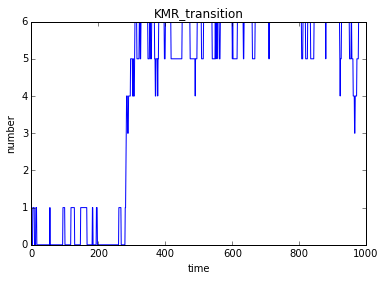

In [221]:
z.simulation()

In [8]:
%matplotlib inline

In [128]:
#クラスにヒストグラムの機能追加
#最初に10人になった時点を表示
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from __future__ import division
import pylab as pl


def tran(n,epsilon):
    
    return_list = [[[4,4],[0,3]],[[3,0],[2,2]]]

    one_return = np.transpose(np.transpose(return_list)[0])

    x = np.empty((n+1,n+1))
    payoff0 = np.empty(2)
    payoff1 =  np.empty(2)

    for i in range(1,n):

        #まずはさっきのpayoff0,payoff1を埋める

        #payoff0[0]にはもともと0だった奴が、0のままにした時の期待利得
        #payoff0[1]にはもともと0だった奴が、1のままにした時の期待利得
        payoff0[0] = one_return[0][0]*(n-i-1)/(n-1) + one_return[0][1]*i/(n-1)
        payoff0[1] = one_return[1][0]*(n-i-1)/(n-1) + one_return[1][1]*i/(n-1)

        #payoff1[0]にはもともと1だった奴が、0に変更した時の期待利得
        #payoff1[1]にはもともと1のやつが、1のままにした時の期待利得
        payoff1[0] = one_return[0][0]*(n-i)/(n-1) + one_return[0][1]*(i-1)/(n-1)
        payoff1[1] = one_return[1][0]*(n-i)/(n-1) + one_return[1][1]*(i-1)/(n-1)

        #まずは1の選択者が増える可能性のある場合
        if payoff0[1] > payoff0[0]:
            x[i][i+1] = ((n-i)/n) * ((1 - epsilon) + epsilon * 0.5) #1の選択者が一人増える確率
            x[i][i] = ((n-i)/n)*epsilon * 0.5 #1の選択者が増えない確率

        elif payoff0[0] == payoff0[1]:
            #0選択者が選ばれた時の話をしているので減ることは考えない
            x[i][i+1] = ((n-i)/n) * 0.5
            x[i][i] = ((n-i)/n) * 0.5

        else:
            x[i][i+1] = ((n-i)/n) * epsilon * 0.5
            x[i][i] = ((n-i)/n) * ((1-epsilon) + epsilon * 0.5)

        #次に1の選択者が減る可能性のある時
        if payoff1[0] > payoff1[1]:
            x[i][i-1] = (i/n) * ((1-epsilon) + epsilon * 0.5)  #増える場合
            x[i][i] +=  (i/n) * epsilon * 0.5

        elif payoff1[0] == payoff1[1]:
            x[i][i-1] = (i/n) * 0.5
            x[i][i] += (i/n) * 0.5

        else:
            x[i][i-1] = (i/n) * epsilon * 0.5
            x[i][i] += (i/n) * ((1-epsilon) + epsilon * 0.5)


    #最初と最後
    x[0][0] = 1- epsilon + epsilon * 0.5
    x[0][1] = epsilon * 0.5
    x[n][n-1] = epsilon * 0.5
    x[n][n] = 1- epsilon + epsilon * 0.5
    
    return x

class KMR:
    
    def __init__(self,n0,epsilon0,t0,q0):
        self.n = n0
        self.epsilon = epsilon0
        self.t = t0
        self.q = q0
        
    def transition(self):
        return tran(self.n, self.epsilon)
    
    def stationary_dist(self):
        mc = qe.MarkovChain(self.transition())
        state_mc = mc.stationary_distributions
        return state_mc
    
    def updata(self):

        if 1<= self.q <= self.n -1:
            a = np.random.rand()
            
            if a<= self.transition()[self.q][self.q-1]:
                self.q = (self.q) - 1

            elif  self.transition()[self.q][self.q-1] < a <= (self.transition()[self.q][self.q] + self.transition()[self.q][self.q-1]):
                self.q = self.q

            elif (self.transition()[self.q][self.q] + self.transition()[self.q][self.q-1])< a:
                self.q = (self.q) + 1

        if self.q == 0:
            b=np.random.rand()
            
            if self.transition()[0][0] < b:
                self.q = self.q + 1
                
            elif b <= self.transition()[0][0]:
                self.q = self.q
                
                
        if self.q == self.n:
            c = np.random.rand()
            
            if c <= self.transition()[self.n][self.n-1]:
                self.q = self.q-1
                
            elif self.transition()[self.n][self.n-1] < c:
                self.q = self.q
        
        
    def generate_sequence(self):
        path = [self.q]
        for i in range(self.t):
            path.append(self.q)
            self.updata()
        return path
    
    def simulation(self):
        fig, ax = plt.subplots()
        plt.ylim(0,self.n)
        plt.title("KMR_transition")
        plt.xlabel("time")
        plt.ylabel("number")
        y = self.generate_sequence()
        plt.plot(y)
        plt.show()
        
    def hist(self):
        pl.hist(self.generate_sequence(),range(0,self.n))
        pl.show()
        
    def first_reach(self):
  
        f = self.generate_sequence()
        return f.index(self.n)

In [142]:
kmr = KMR(10 ,0.05,10000,0)

In [130]:
kmr.transition()

array([[ 0.975 ,  0.025 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.0975,  0.88  ,  0.0225,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.195 ,  0.785 ,  0.02  ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.2925,  0.3575,  0.35  ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.2   ,  0.215 ,  0.585 ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0125,  0.5   ,  0.4875,
         0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.015 ,  0.595 ,
         0.39  ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.0175,
         0.69  ,  0.2925,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
 

In [132]:
kmr.stationary_dist()

array([[  1.30871481e-05,   3.35567899e-06,   3.87193729e-07,
          2.64747849e-08,   4.63308736e-08,   2.16828488e-06,
          7.04692587e-05,   1.57045777e-03,   2.29679448e-02,
          1.99055522e-01,   7.76316535e-01]])

In [134]:
kmr.generate_sequence()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


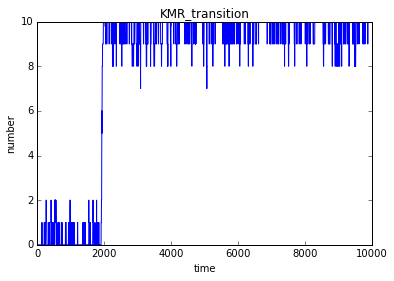

In [137]:
kmr.simulation()

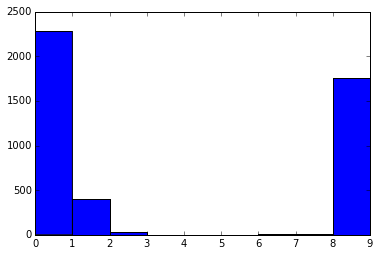

In [139]:
kmr.hist()

In [141]:
kmr.first_reach()

5463